
# Práctica 2: Implementación de Algoritmos  
**Grado en Inteligencia Artificial**  
**Guillermo Blanco Núñez**<br>
*16/11/2025*

La práctica consiste en implementar operaciones de procesado de imagen vistas en clase con el objetivo de comprender su funcionamiento y sus efectos sobre las imagenes de entrada.

---


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import io, img_as_float
from numpy.fft import fft2, ifft2, fftshift


## 2.1. Filtrado espacial: suavizado

### Función 1: 

Implementar una función que calcule un kernel Gaussiano unidimensional con σ dado.

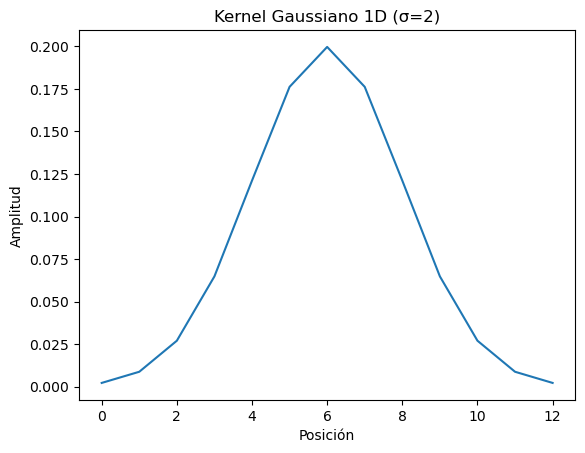

In [2]:

def gaussianFilterSpatial1D(sigma):
    if sigma <= 0:
        raise ValueError("sigma debe ser > 0")

    N = int(2 * np.ceil(3 * sigma) + 1)
    center = N // 2
    kernel = np.zeros(N)
    for i in range(N):
        x = i - center
        kernel[i] = np.exp(-(x**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel

# Ejemplo
sigma = 2
kernel = gaussianFilterSpatial1D(sigma)
plt.plot(kernel)
plt.title(f'Kernel Gaussiano 1D (σ={sigma})')
plt.xlabel('Posición')
plt.ylabel('Amplitud')
plt.show()


### Función 2:

Implementar una función que permita realizar un suavizado Gaussiano bidimensional usando un filtro N × N de parámetro σ, donde N se calcula igual que en la función anterior.

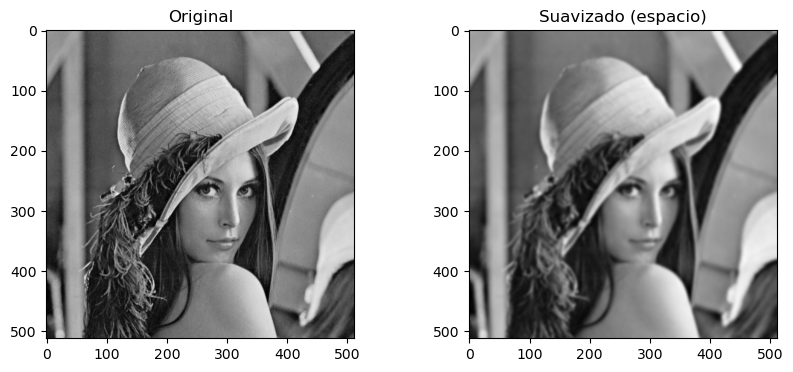

In [5]:

def ApplyGaussianFilterSpatial(inImage, sigma):
    kernel = gaussianFilterSpatial1D(sigma)
    temp = convolve2d(inImage, kernel[np.newaxis, :], mode='same', boundary='symm')
    outImage = convolve2d(temp, kernel[:, np.newaxis], mode='same', boundary='symm')
    return outImage

# Ejemplo
img = img_as_float(io.imread('../PVC_Pract1/Material Adicional/lena.png', as_gray=True))
out = ApplyGaussianFilterSpatial(img, sigma=2)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(out, cmap='gray'); plt.title('Suavizado (espacio)')
plt.show()


###  Función 3: 

Implementar una función que calcule un filtro gaussiano en frecuencia, de tamaño N × M y un σ dado.

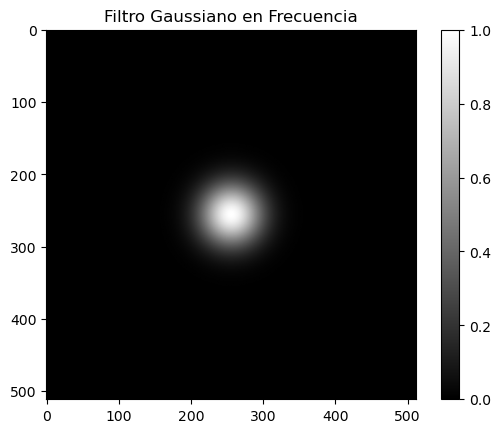

In [6]:

def gaussianFilterFrec(inImage, sigma):
    N, M = inImage.shape[:2]
    u = np.arange(-N//2, N//2)
    v = np.arange(-M//2, M//2)
    U, V = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = np.exp(-(D**2) / (2 * sigma**2))
    return H

# Visualización
H = gaussianFilterFrec(img, sigma=30)
plt.imshow(H, cmap='gray')
plt.title('Filtro Gaussiano en Frecuencia')
plt.colorbar()
plt.show()


###  Función 4: 

Implementar una función que aplique el filtro gaussiano en frecuencia anterior sobre una imagen, con el filtro del tamño de la imagen y un σ dado.


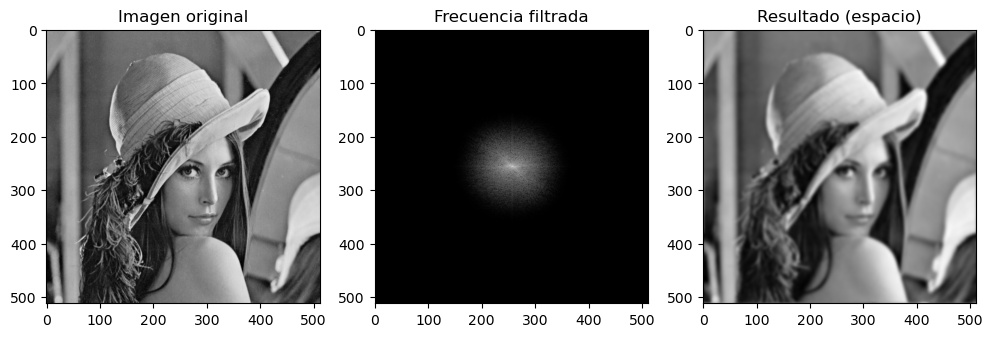

In [7]:

def ApplyGaussianFilterFrec(inImage, sigma):
    if inImage.ndim != 2:
        raise ValueError("Solo se admiten imágenes en escala de grises")

    F = fft2(inImage)
    Fshift = fftshift(F)
    H = gaussianFilterFrec(inImage, sigma)
    G = Fshift * H
    G_ishift = np.fft.ifftshift(G)
    outImage = np.real(ifft2(G_ishift))
    return outImage, np.log(1 + np.abs(Fshift * H))

# Ejemplo
out_freq, freq_repr = ApplyGaussianFilterFrec(img, sigma=30)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Imagen original')
plt.subplot(1,3,2); plt.imshow(freq_repr, cmap='gray'); plt.title('Frecuencia filtrada')
plt.subplot(1,3,3); plt.imshow(out_freq, cmap='gray'); plt.title('Resultado (espacio)')
plt.show()
